In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
MLA = [KNeighborsClassifier(), GaussianNB(),  LogisticRegression(), 
       DecisionTreeClassifier(), RandomForestClassifier(),
       AdaBoostClassifier()]

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

from numpy.random import seed
import tensorflow
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json
from sklearn.preprocessing import MinMaxScaler
import joblib


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [2]:
dataset = pd.read_csv('merged_dataset_BearingTest_2.csv', index_col=0)

In [3]:
sample = pd.read_csv('sample_2nd.csv', index_col=0)

In [4]:
dataset

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
...,...,...,...,...
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786


In [5]:
sample

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,-0.005,-0.015,0.012,-0.056
1,-0.071,0.127,-0.112,-0.107
2,-0.076,0.095,-0.134,-0.095
3,0.061,0.127,-0.076,-0.100
4,0.251,0.068,-0.044,0.007
...,...,...,...,...
20474,-0.076,0.146,-0.300,-0.005
20475,0.032,0.056,0.232,-0.054
20476,0.110,0.029,0.073,-0.068
20477,0.056,0.015,-0.193,-0.005


## 1. 전처리

In [6]:
from sklearn import preprocessing

# Dataset is scaled so that maximum for every column is 1
scaler = preprocessing.MinMaxScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), 
                              columns=dataset.columns, 
                              index=dataset.index)
dataset_scaled.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,984.000000,984.000000,984.000000,984.000000
mean,0.176344,0.485273,0.535517,0.393047
std,0.088842,0.073507,0.077007,0.081305
min,0.000000,0.000000,0.000000,0.000000
25%,0.131803,0.458450,0.505473,0.360049
50%,0.134550,0.464499,0.514541,0.364941
75%,0.181470,0.478561,0.530498,0.395511
max,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset_scaled

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.126423,0.443462,0.548041,0.352522
2004-02-12 10:42:39,0.127888,0.457029,0.555967,0.365087
2004-02-12 10:52:39,0.130633,0.458408,0.552584,0.364252
2004-02-12 11:02:39,0.133329,0.456021,0.556113,0.369692
2004-02-12 11:12:39,0.133120,0.467033,0.545350,0.370007
...,...,...,...,...
2004-02-19 05:42:39,1.000000,1.000000,0.907962,1.000000
2004-02-19 05:52:39,0.744004,0.821423,0.958115,0.770575
2004-02-19 06:02:39,0.773924,0.945396,1.000000,0.844652
2004-02-19 06:12:39,0.001523,0.018499,0.019523,0.000745


## 2. EDA

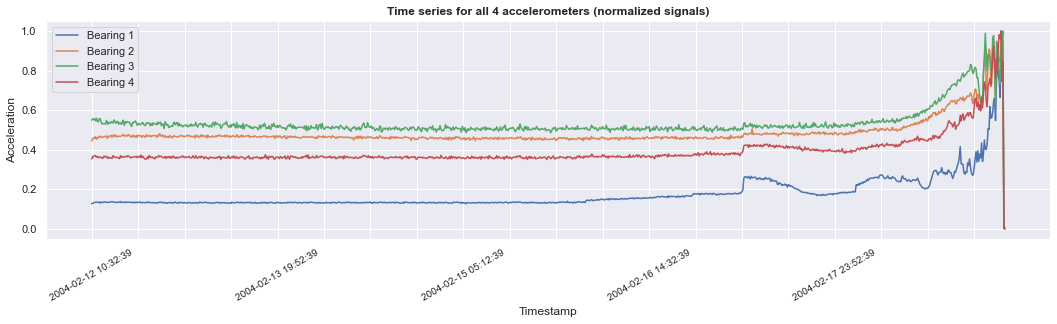

In [8]:
x_ticks_span = 50

dataset_scaled.plot(figsize=(18, 4))
plt.xlabel('Timestamp')
plt.xticks(np.arange(0, dataset_scaled.shape[0], x_ticks_span), fontsize=10, rotation = 30)
plt.ylabel('Acceleration')


plt.legend(loc="upper left")  
plt.title('Time series for all 4 accelerometers (normalized signals)', fontweight ="bold")
plt.show()

In [9]:
print("dataset_scaled shape is",dataset_scaled.shape,"\n\n", dataset_scaled.index)


dataset_scaled shape is (984, 4) 

 Index(['2004-02-12 10:32:39', '2004-02-12 10:42:39', '2004-02-12 10:52:39',
       '2004-02-12 11:02:39', '2004-02-12 11:12:39', '2004-02-12 11:22:39',
       '2004-02-12 11:32:39', '2004-02-12 11:42:39', '2004-02-12 11:52:39',
       '2004-02-12 12:02:39',
       ...
       '2004-02-19 04:52:39', '2004-02-19 05:02:39', '2004-02-19 05:12:39',
       '2004-02-19 05:22:39', '2004-02-19 05:32:39', '2004-02-19 05:42:39',
       '2004-02-19 05:52:39', '2004-02-19 06:02:39', '2004-02-19 06:12:39',
       '2004-02-19 06:22:39'],
      dtype='object', length=984)


In [10]:
dataset_train = dataset_scaled[:'2004-02-13 23:52:39']
dataset_test  = dataset_scaled['2004-02-14 00:02:39':]
# Random shuffle training data
dataset_train.sample(frac=1)

print("Train dataset has lenght", dataset_train.shape[0], "while test dataset is", dataset_test.shape[0],
      "TOTAL=", dataset_train.shape[0]+dataset_test.shape[0])

Train dataset has lenght 225 while test dataset is 759 TOTAL= 984


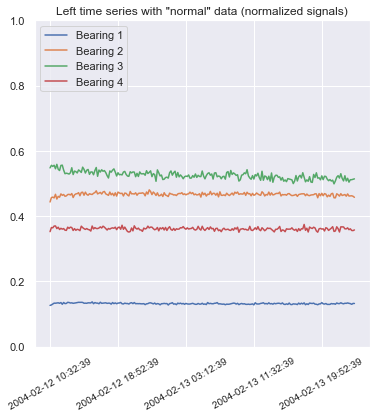

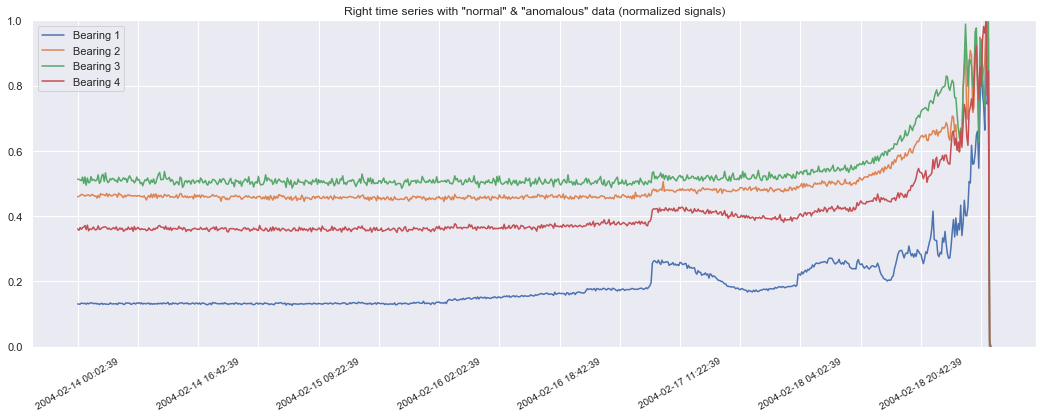

In [11]:
x_ticks_span = 50

dataset_train.plot(figsize = (6,6), title ='Left time series with "normal" data (normalized signals)')
plt.xticks(np.arange(0, dataset_train.shape[0], x_ticks_span), fontsize=10, rotation = 30)
plt.ylim(0,1)
plt.legend(loc="upper left")  
plt.show()

dataset_test.plot(figsize = (18,6), title='Right time series with "normal" & "anomalous" data (normalized signals)')
plt.xticks(np.arange(0, dataset_test.shape[0], x_ticks_span), fontsize=10, rotation = 30)
plt.ylim(0,1)
plt.legend(loc="upper left")  
plt.show()

In [12]:
from sklearn.decomposition import PCA

n_components = 4 # How many dimensions you want to reduce to
pca = PCA(n_components=n_components, svd_solver= 'full')

In [13]:
# Compute all PCA components FOR THE TRAINING SET
X_train_PCA = pca.fit_transform(dataset_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = dataset_train.index

# Project the TEST SET onto the PCA space
X_test_PCA = pca.transform(dataset_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = dataset_test.index

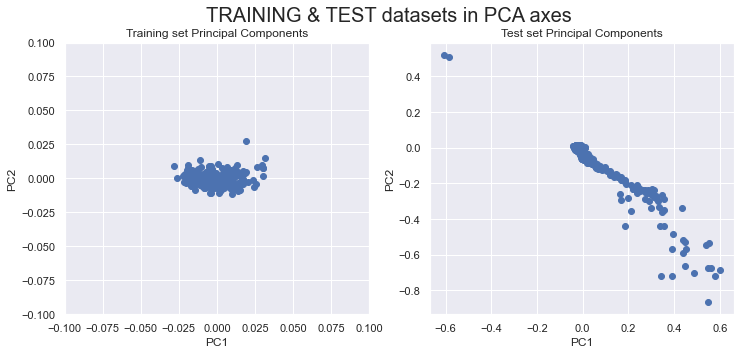

In [14]:
from matplotlib import gridspec
fig, axes = plt.subplots(1,2, figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
fig.suptitle('TRAINING & TEST datasets in PCA axes', fontsize=20)

ax0 = plt.subplot(gs[0])
ax0.scatter(X_train_PCA.loc[:,0], X_train_PCA.loc[:,1])
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-0.1,0.1)
ax0.set_ylim(-0.1,0.1)
ax0.set_title('Training set Principal Components')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test_PCA.loc[:,0], X_test_PCA.loc[:,1])
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('Test set Principal Components')

plt.show()

In [15]:
np.set_printoptions(precision=3, suppress=True) # 3 decimal places and don't use scientific notation

pca.fit_transform(dataset_train)
print(pca.explained_variance_ratio_)

[0.768 0.141 0.078 0.014]


In [16]:
np.set_printoptions(precision=1, suppress=False) # Use scientific notation
print(pca.explained_variance_)

[1.4e-04 2.7e-05 1.5e-05 2.5e-06]


## 3. PCA를 통한 마할라노비스 거리 측정

In [17]:
pca = PCA(n_components= 2, svd_solver= 'full')

# Compute (2) PCA most relevant components FOR THE TRAINING SET
X_train_PCA = pca.fit_transform(dataset_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = dataset_train.index

# Project the TEST SET onto the PCA space (2 dimensions)
X_test_PCA = pca.transform(dataset_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = dataset_test.index

In [18]:
# CALCULATE THE COVARIANCE
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
        
# CALCULATE THE MAHALANOBIS DISTANCE
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

# CHECK IF MATRIX IS POSITIVE DEFINITE
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [19]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [20]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [21]:
# Mean of each column: PCA1, PCA2
## - It should be very close to zero
mean_distr = data_train.mean(axis=0) # axis=0 means that average is computed per column
np.set_printoptions(precision=3, suppress=False)
mean_distr

array([-2.665e-17,  4.503e-17])

In [22]:
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)

print("Minimum & maximum MD in training set:", min(dist_train), max(dist_train) )
print("Minimum & maximum MD in test set    :", min(dist_test), max(dist_test) )

Minimum & maximum MD in training set: 0.06969926535468123 5.5057673841682515
Minimum & maximum MD in test set    : 0.2365578726030282 173.80027849014354


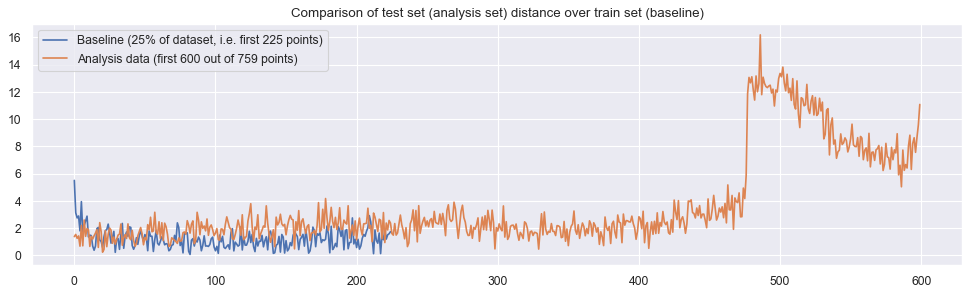

In [23]:
figure(figsize=(15, 4), dpi=80)
plt.plot(np.array(dist_train) , label="Baseline (25% of dataset, i.e. first 225 points)")
plt.plot(np.array(dist_test)[:600], label="Analysis data (first 600 out of 759 points)")
plt.legend(loc="upper left")
plt.title("Comparison of test set (analysis set) distance over train set (baseline)")
plt.show()

In [24]:
# CALCULATE THRESHOLD FOR CLASSIFYING AS ANOMALY
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

threshold = MD_threshold(dist_train, extreme = True)
#  * extreme = True => twice the mean of incoming data (dist_train)
#  * extreme = False => three times the mean
print("Threshold value for flagging an anomaly is", "{:.2f}".format(threshold) )

Threshold value for flagging an anomaly is 3.66


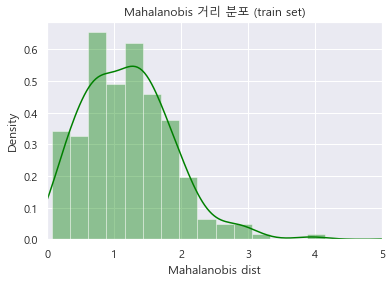

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import seaborn as sns
plt.figure()
sns.distplot(dist_train,
             bins = 20, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')
plt.title('Mahalanobis 거리 분포 (train set)')
plt.show()

## 4. Anomaly distance

In [26]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

n_outliers_train = anomaly_train[ anomaly_train['Anomaly'] == True].shape[0]
print("There are", n_outliers_train, "anomalies in the train set out of", anomaly_train.shape[0], "points")
anomaly_train.head()

There are 2 anomalies in the train set out of 225 points


,Mob dist,Thresh,Anomaly
2004-02-12 10:32:39,5.505767,3.655333,True
2004-02-12 10:42:39,3.131046,3.655333,False
2004-02-12 10:52:39,2.752050,3.655333,False
2004-02-12 11:02:39,2.893310,3.655333,False
2004-02-12 11:12:39,1.800885,3.655333,False


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


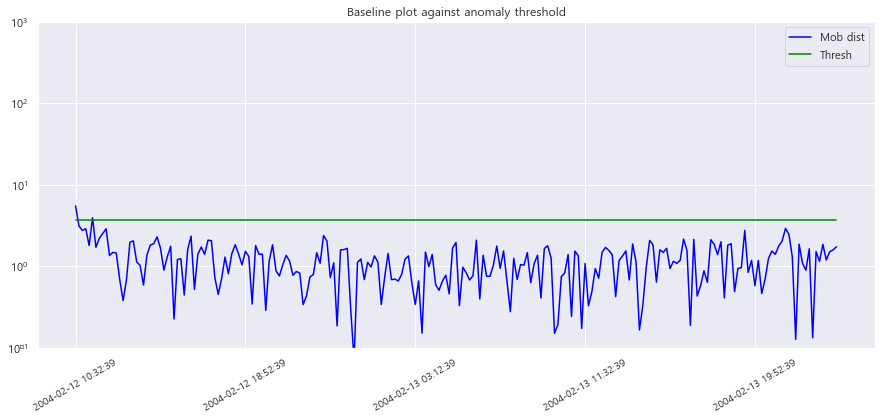

In [27]:
anomaly_train.plot(logy=True, figsize = (15,6), ylim = [1e-1,1e3], color = ['blue','green'])
plt.xticks(np.arange(0, anomaly_train.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Baseline plot against anomaly threshold')
plt.show()

In [28]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index

n_outliers = anomaly[ anomaly['Anomaly'] == True].shape[0]
print("There are", n_outliers, "anomalies in the test set out of", anomaly.shape[0], "points")
anomaly_train

There are 306 anomalies in the test set out of 759 points


,Mob dist,Thresh,Anomaly
2004-02-12 10:32:39,5.505767,3.655333,True
2004-02-12 10:42:39,3.131046,3.655333,False
2004-02-12 10:52:39,2.752050,3.655333,False
2004-02-12 11:02:39,2.893310,3.655333,False
2004-02-12 11:12:39,1.800885,3.655333,False
...,...,...,...
2004-02-13 23:12:39,1.858725,3.655333,False
2004-02-13 23:22:39,1.197478,3.655333,False
2004-02-13 23:32:39,1.512400,3.655333,False
2004-02-13 23:42:39,1.589651,3.655333,False


In [29]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
2004-02-14 00:02:39,1.380601,3.655333,False
2004-02-14 00:12:39,1.538392,3.655333,False
2004-02-14 00:22:39,1.255249,3.655333,False
2004-02-14 00:32:39,1.428627,3.655333,False
2004-02-14 00:42:39,0.676830,3.655333,False


In [30]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance.csv')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


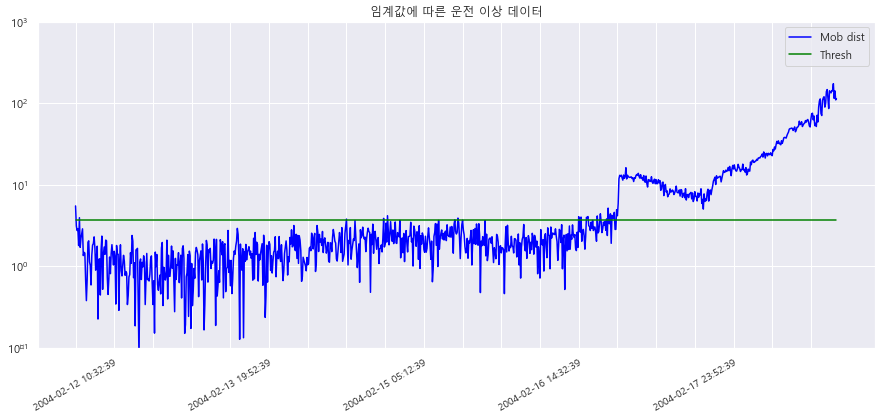

In [31]:
anomaly_alldata.plot(logy=True, figsize = (15,6), ylim = [1e-1,1e3], color = ['blue','green'])
plt.xticks(np.arange(0, anomaly_alldata.shape[0], 50), fontsize=10, rotation = 30)
plt.title('임계값에 따른 운전 이상 데이터')
plt.show()

## 5. 딥러닝 모델을 통한 성능평가

In [32]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(data_train)
X_test = scaler.transform(data_test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [33]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (225, 1, 2)
Test data shape: (759, 1, 2)


In [34]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [35]:
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 2)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 16)             1216      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 4)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 2)              34    

In [36]:
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/100
22/22 [==============================] - 6s 70ms/step - loss: 0.3739 - val_loss: 0.2737
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3423 - val_loss: 0.2390
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3070 - val_loss: 0.1991
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2705 - val_loss: 0.1549
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2343 - val_loss: 0.1169
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1783 - val_loss: 0.0976
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1588 - val_loss: 0.1105
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1389 - val_loss: 0.1306
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1170 - val_loss: 0.1432
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1034 - val_loss: 0.1492
Epoch 11

22/22 [==============================] - 0s 5ms/step - loss: 0.0592 - val_loss: 0.0704
Epoch 84/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0608 - val_loss: 0.0682
Epoch 85/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0608 - val_loss: 0.0676
Epoch 86/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0580 - val_loss: 0.0675
Epoch 87/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0570 - val_loss: 0.0667
Epoch 88/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0596 - val_loss: 0.0677
Epoch 89/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0603 - val_loss: 0.0686
Epoch 90/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0608 - val_loss: 0.0664
Epoch 91/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0533 - val_loss: 0.0658
Epoch 92/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0603 - val_loss: 0.0653
Epoch 93/100


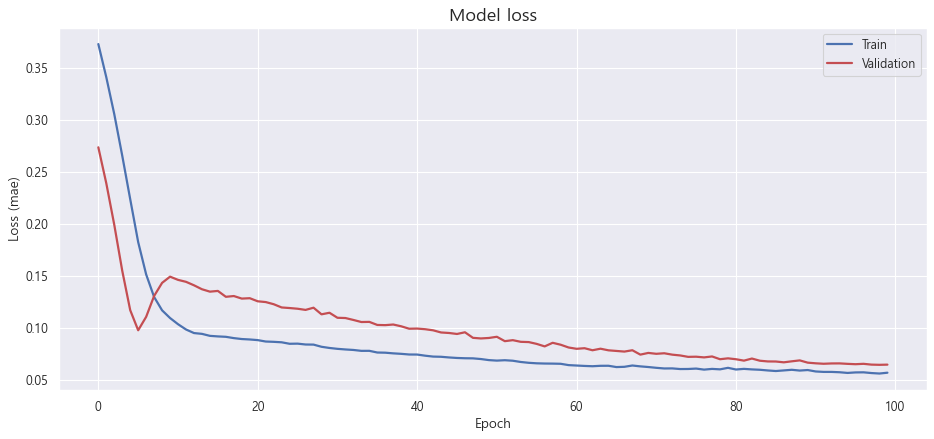

In [37]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

## 6. Anomaly data vs Cycle Time

In [38]:
data1 = pd.read_csv('3_merged_dataset_BearingTest_2.csv')


In [39]:
data1

,Cycle Time,Anomaly
0,1.042,True
1,1.083,False
2,1.125,False
3,1.167,False
4,1.208,False
...,...,...
979,41.833,True
980,41.875,True
981,41.917,True
982,41.958,True


In [40]:
data1['Anomaly'] = data1['Anomaly'].map({True:'1', False:'0'})

In [41]:
data1['Anomaly'].astype('int')

0      1
1      0
2      0
3      0
4      0
      ..
979    1
980    1
981    1
982    1
983    1
Name: Anomaly, Length: 984, dtype: int32

In [42]:
data1

,Cycle Time,Anomaly
0,1.042,1
1,1.083,0
2,1.125,0
3,1.167,0
4,1.208,0
...,...,...
979,41.833,1
980,41.875,1
981,41.917,1
982,41.958,1


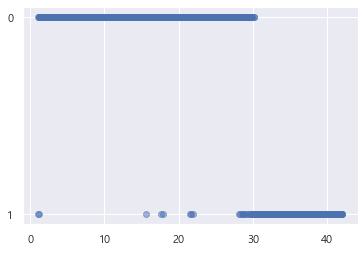

In [43]:
import matplotlib.pyplot as plt

plt.scatter(data1['Cycle Time'], data1['Anomaly'], alpha=0.5)

plt.show()


<AxesSubplot:ylabel='Frequency'>

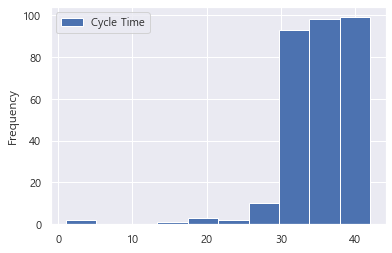

In [44]:
warning = data1.iloc[np.where(data1['Anomaly']=='1')]
warning.plot(kind='hist')

In [45]:
df = pd.read_csv('merged_dataset_BearingTest_2.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  984 non-null    object 
 1   Bearing 1   984 non-null    float64
 2   Bearing 2   984 non-null    float64
 3   Bearing 3   984 non-null    float64
 4   Bearing 4   984 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.6+ KB


In [47]:
train = pd.read_csv('1_merged_dataset_BearingTest_2.csv')

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  984 non-null    object 
 1   Bearing 1   984 non-null    float64
 2   Bearing 2   984 non-null    float64
 3   Bearing 3   984 non-null    float64
 4   Bearing 4   984 non-null    float64
 5   Anomaly     984 non-null    bool   
dtypes: bool(1), float64(4), object(1)
memory usage: 39.5+ KB


In [49]:
train

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Anomaly
0,2004-02-12 10:32,0.058333,0.071832,0.083242,0.043067,True
1,2004-02-12 10:42,0.058995,0.074006,0.084435,0.044541,False
2,2004-02-12 10:52,0.060236,0.074227,0.083926,0.044443,False
3,2004-02-12 11:02,0.061455,0.073844,0.084457,0.045081,False
4,2004-02-12 11:12,0.061361,0.075609,0.082837,0.045118,False
...,...,...,...,...,...,...
979,2004-02-19 5:42,0.453335,0.161016,0.137440,0.119047,True
980,2004-02-19 5:52,0.337583,0.132400,0.144992,0.092125,True
981,2004-02-19 6:02,0.351111,0.152266,0.151299,0.100817,True
982,2004-02-19 6:12,0.001857,0.003732,0.003656,0.001786,True


## 7. Auto ML

### - Preprocessing

In [50]:
y_train = train['Anomaly']

In [51]:
y_train

0       True
1      False
2      False
3      False
4      False
       ...  
979     True
980     True
981     True
982     True
983     True
Name: Anomaly, Length: 984, dtype: bool

In [52]:
x_train = train.drop('Anomaly', axis=1, inplace = True)

In [53]:
df = pd.concat([train, y_train], axis =1,  sort = True)

In [54]:
df

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Anomaly
0,2004-02-12 10:32,0.058333,0.071832,0.083242,0.043067,True
1,2004-02-12 10:42,0.058995,0.074006,0.084435,0.044541,False
2,2004-02-12 10:52,0.060236,0.074227,0.083926,0.044443,False
3,2004-02-12 11:02,0.061455,0.073844,0.084457,0.045081,False
4,2004-02-12 11:12,0.061361,0.075609,0.082837,0.045118,False
...,...,...,...,...,...,...
979,2004-02-19 5:42,0.453335,0.161016,0.137440,0.119047,True
980,2004-02-19 5:52,0.337583,0.132400,0.144992,0.092125,True
981,2004-02-19 6:02,0.351111,0.152266,0.151299,0.100817,True
982,2004-02-19 6:12,0.001857,0.003732,0.003656,0.001786,True


### - 15개의 기본 모델을 학습하고 모델들의 성능을 비교& 분석

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(df, y_train, test_size=0.3, random_state=1357)

In [56]:
from pycaret.classification import*
clf = setup(data = df,
            target = 'Anomaly', 
            train_size = 0.70, # test 30% Hold-out
            session_id = 1357)


,Description,Value
0,session_id,1357
1,Target,Anomaly
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(984, 6)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [57]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9855,0.9995,0.9582,0.9955,0.9757,0.9654,0.9665,0.1250
catboost,CatBoost Classifier,0.9899,0.9986,0.9721,0.9957,0.9834,0.9761,0.9766,1.1190
lightgbm,Light Gradient Boosting Machine,0.9840,0.9968,0.9673,0.9826,0.9740,0.9625,0.9634,0.1630
et,Extra Trees Classifier,0.9811,0.9959,0.9537,0.9859,0.9690,0.9554,0.9562,0.0940
xgboost,Extreme Gradient Boosting,0.9811,0.9954,0.9580,0.9824,0.9691,0.9555,0.9566,0.0840
ada,Ada Boost Classifier,0.9825,0.9939,0.9673,0.9778,0.9717,0.9591,0.9600,0.0490
gbc,Gradient Boosting Classifier,0.9840,0.9892,0.9673,0.9826,0.9741,0.9626,0.9634,0.0610
knn,K Neighbors Classifier,0.9782,0.9891,0.9353,0.9950,0.9635,0.9481,0.9496,0.0170
nb,Naive Bayes,0.9462,0.9883,0.9673,0.8843,0.9210,0.8809,0.8860,0.0080
dt,Decision Tree Classifier,0.9855,0.9818,0.9721,0.9826,0.9766,0.9661,0.9668,0.0070


### - Score 최적화를 위해 soft vote ensemble 사용

In [58]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9928,0.9993,0.9767,1.0000,0.9882,0.9830,0.9831
1,0.9783,0.9980,0.9535,0.9762,0.9647,0.9490,0.9491
2,0.9855,0.9976,0.9535,1.0000,0.9762,0.9658,0.9663
3,0.9854,1.0000,0.9524,1.0000,0.9756,0.9652,0.9658
4,0.9927,1.0000,1.0000,0.9773,0.9885,0.9832,0.9833
Mean,0.9869,0.9990,0.9672,0.9907,0.9786,0.9692,0.9695
SD,0.0054,0.0010,0.0188,0.0114,0.0089,0.0128,0.0128


### - Train dataset을 통해 예측률 확인 (예측성공률 AUC : 0.9971)

In [59]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9899,0.9971,0.9681,1.0000,0.9838,0.9764,0.9767


In [60]:
#final_model = finalize_model(blended)

### - Test dataset을 통한 최종 Score 추출

In [61]:
predictions = predict_model(blended, data = X_test)

In [62]:
predictions

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Anomaly,Label,Score
922,2004-02-18 20:12,0.135441,0.101704,0.106483,0.064628,True,True,0.9996
663,2004-02-17 1:02,0.080619,0.073381,0.074951,0.046038,False,False,0.9695
430,2004-02-15 10:12,0.061259,0.073825,0.076370,0.043862,False,False,0.9996
436,2004-02-15 11:12,0.060574,0.073734,0.078335,0.044990,False,False,0.9995
829,2004-02-18 4:42,0.107025,0.079255,0.081654,0.050016,True,True,0.9994
...,...,...,...,...,...,...,...,...
763,2004-02-17 17:42,0.088087,0.077353,0.078826,0.048751,True,True,0.9990
470,2004-02-15 16:52,0.060506,0.074216,0.077986,0.043824,False,False,0.9998
688,2004-02-17 5:12,0.080520,0.076580,0.077212,0.046528,True,True,0.9054
953,2004-02-19 1:22,0.153324,0.106464,0.115636,0.074150,True,True,0.9996


### - ML모델 평가

In [63]:
evaluate_model(blended)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [64]:
predictions['Label'].astype('object')

922     True
663    False
430    False
436    False
829     True
       ...  
763     True
470    False
688     True
953     True
832     True
Name: Label, Length: 296, dtype: object

In [65]:
predictions['Anomaly'].astype('object')

922     True
663    False
430    False
436    False
829     True
       ...  
763     True
470    False
688     True
953     True
832     True
Name: Anomaly, Length: 296, dtype: object